In [152]:
import pandas as pd

In [153]:
import matplotlib.pyplot as plt

In [154]:
plt.style.use("seaborn")

In [155]:
# upload arquivo
from google.colab import files
arq = files.upload()

Saving ArquivoNovo1.xlsx to ArquivoNovo1 (1).xlsx


In [174]:
 # Criando nossa Data Freme
df = pd.read_excel("ArquivoNovo1.xlsx")

In [175]:
df.head(100)

,Primeiro Contato,Cliente,Protudo / Serviço,Preço,Quantidade,Preço Total,Próximo Contato,Horário,Custo Und.
0,2019-12-01,Dois Irmãos,Produto 01,1000,2,2000,2020-01-20,09:00:00,500
1,2020-09-05,Escola J.R,Produto 01,1500,1,1500,2020-01-21,10:00:00,545
2,2019-05-19,Mercado Economia,Produto 02,900,4,3600,2020-01-22,11:00:00,750
3,2019-12-01,Dois Irmãos,Produto 01,1558,1,1558,2020-01-23,12:00:00,145
4,2018-09-05,Escola J.R,Produto 01,11,57,627,2020-01-24,13:00:00,11
5,2011-05-19,Mercado Economia,Produto 02,15,55,825,2020-01-25,14:00:00,40
6,2019-12-01,Escola J.R,Produto 01,1584,5,7920,2020-01-26,15:00:00,158
7,2020-09-05,Mercado Economia,Produto 01,1894,5,9470,2020-01-27,16:00:00,15
8,2019-05-19,Dois Irmãos,Produto 02,11,77,847,2020-01-28,17:00:00,11
9,2019-12-01,Escola J.R,Produto 01,15815,54,854010,2020-01-29,18:00:00,10


In [176]:
df.shape

(18, 9)

In [177]:
df.dtypes

Primeiro Contato     datetime64[ns]
Cliente                      object
Protudo / Serviço            object
Preço                         int64
Quantidade                    int64
Preço Total                   int64
Próximo Contato      datetime64[ns]
Horário                      object
Custo Und.                    int64
dtype: object

In [178]:
#Qual Foi a Primeira venda
df["Preço Total"].sum()

941211

In [179]:
#Criando Coluna Custo
df["Custo"] = df["Custo Und."].mul(df["Quantidade"])

In [180]:
df.head()

,Primeiro Contato,Cliente,Protudo / Serviço,Preço,Quantidade,Preço Total,Próximo Contato,Horário,Custo Und.,Custo
0,2019-12-01,Dois Irmãos,Produto 01,1000,2,2000,2020-01-20,09:00:00,500,1000
1,2020-09-05,Escola J.R,Produto 01,1500,1,1500,2020-01-21,10:00:00,545,545
2,2019-05-19,Mercado Economia,Produto 02,900,4,3600,2020-01-22,11:00:00,750,3000
3,2019-12-01,Dois Irmãos,Produto 01,1558,1,1558,2020-01-23,12:00:00,145,145
4,2018-09-05,Escola J.R,Produto 01,11,57,627,2020-01-24,13:00:00,11,627


In [181]:
# Custo Total
round(df["Custo"].sum(), 2)


138136

In [182]:
# Lucro
df["Lucro"] = df["Preço Total"] - df["Custo"]

In [183]:
df.head(1)

,Primeiro Contato,Cliente,Protudo / Serviço,Preço,Quantidade,Preço Total,Próximo Contato,Horário,Custo Und.,Custo,Lucro
0,2019-12-01,Dois Irmãos,Produto 01,1000,2,2000,2020-01-20,09:00:00,500,1000,1000


In [184]:
df["Pós-Venda"] = (df["Primeiro Contato"] - df["Próximo Contato"]).dt.days

In [185]:
df.head(1)

,Primeiro Contato,Cliente,Protudo / Serviço,Preço,Quantidade,Preço Total,Próximo Contato,Horário,Custo Und.,Custo,Lucro,Pós-Venda
0,2019-12-01,Dois Irmãos,Produto 01,1000,2,2000,2020-01-20,09:00:00,500,1000,1000,-50


In [189]:
df["Pós-Venda"].dtype

dtype('int64')

In [191]:
df.groupby("Protudo / Serviço")["Quantidade"].sum().sort_values(ascending=False)

Protudo / Serviço
Produto 02    230
Produto 01    209
Produto 03     51
Name: Quantidade, dtype: int64

Text(0.5, 0, 'Total')

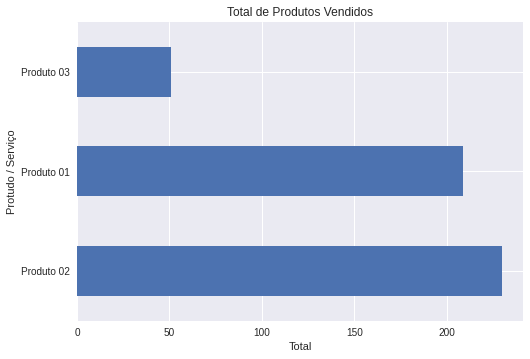

In [193]:
df.groupby("Protudo / Serviço")["Quantidade"].sum().sort_values(ascending=False).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Protudo / Serviço")
plt.xlabel("Total")

Text(0.5, 0, 'Total')

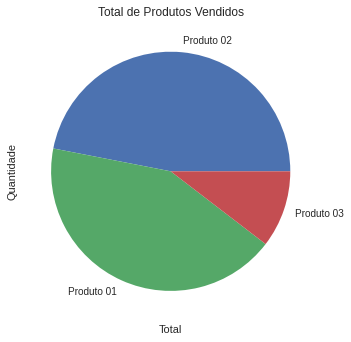

In [194]:
df.groupby("Protudo / Serviço")["Quantidade"].sum().sort_values(ascending=False).plot.pie(title="Total de Produtos Vendidos")
plt.xlabel("Protudo / Serviço")
plt.xlabel("Total")

Text(0.5, 0, 'Total')

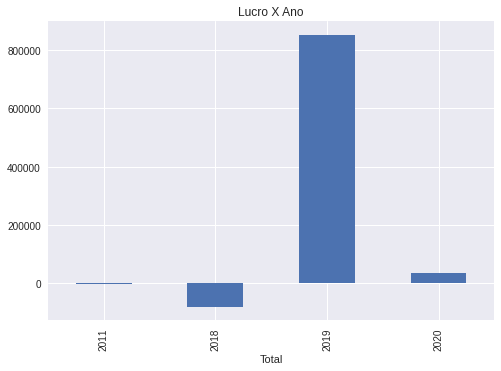

In [196]:
df.groupby(df["Primeiro Contato"].dt.year)["Lucro"].sum().plot.bar(title="Lucro X Ano")
plt.xlabel("Protudo / Serviço")
plt.xlabel("Total")